<a href="https://colab.research.google.com/github/yashwanth-kokkanti/kerasPractise/blob/main/biDirectionalLSTMKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## This notebook demonstrates Bidirectional LSTM using Keras 


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np



In [ ]:

max_features = 20000  # Only consider the top 20k words
maxlen = 200  # Only consider the first 200 words of each movie review



In [ ]:
## Build the model 

inputs = keras.Input(shape=(None,), dtype='int32')

x = layers.Embedding(max_features, 128)(inputs) ## Embedding each integer in a 128 dimensional vector 

x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x) ## First layer has Return sequences 
x = layers.Bidirectional(layers.LSTM(64, ))(x)

## Adding a classifier 
outputs = layers.Dense(1, activation='sigmoid')(x)

model = keras.Model(inputs, outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding (Embedding)        (None, None, 128)         2560000   
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         98816     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 2,757,761
Trainable params: 2,757,761
Non-trainable params: 0
_________________________________________________________________


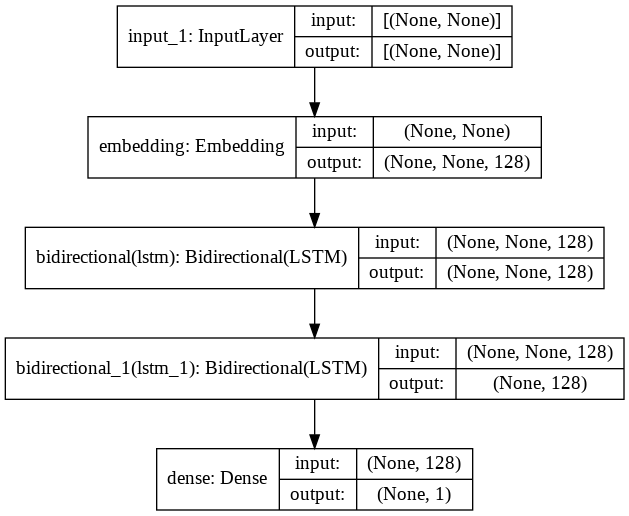

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
## Load the IMDB movie review sentiment data 

(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(num_words=max_features)

print(len(x_train), "Training sequences")
print(len(x_val), "Validation sequences")

x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_val = keras.preprocessing.sequence.pad_sequences(x_val, maxlen=maxlen)


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

25000 Training sequences
25000 Validation sequences


In [ ]:
## Train and evaluate the model 

model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])



In [ ]:
model.fit(x_train, y_train, batch_size=32, epochs=3, validation_data=(x_val, y_val))

Epoch 1/3
782/782 [==============================] - 63s 67ms/step - loss: 0.5061 - accuracy: 0.7478 - val_loss: 0.3415 - val_accuracy: 0.8597
Epoch 2/3
782/782 [==============================] - 51s 66ms/step - loss: 0.2211 - accuracy: 0.9169 - val_loss: 0.3533 - val_accuracy: 0.8443
Epoch 3/3
782/782 [==============================] - 51s 66ms/step - loss: 0.1298 - accuracy: 0.9558 - val_loss: 0.3727 - val_accuracy: 0.8570


In [ ]:
model.evaluate(x_val, y_val)

782/782 [==============================] - 12s 15ms/step - loss: 0.3727 - accuracy: 0.8570


[0.3726675510406494, 0.8570399880409241]